# Single GBM Simulation


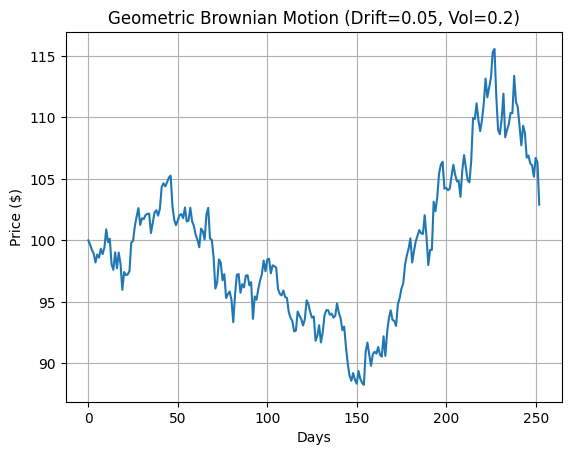

In [5]:
import numpy as np
import matplotlib.pyplot as plt

S0 = 100        # Initial Stock Price ($)
mu = 0.05       # Drift (Expected Return: 5%)
sigma = 0.2    # Volatility (Risk: 20%)
T = 1.0         # Time Horizon (1 Year)
dt = 1/252      # Time Step (1 Trading Day)
N = int(T/dt)   # Number of Steps (252)

prices = [S0]

for step in range(N):
    # Get the current price (the last item in the list)
    current_price = prices[-1]
    
    # Generate the Random Shock (Epsilon)
    epsilon = np.random.normal(loc=0, scale=1)
    
    # Calculate dS (Change in Price)
    # Formula: Drift_Term + Diffusion_Term
    # Remember the Square Root Rule!
    dS = (mu * current_price * dt) + (sigma * current_price * epsilon * np.sqrt(dt))
    
    # Update Price
    new_price = current_price + dS
    
    # Store it
    prices.append(new_price)


plt.plot(prices)
plt.title(f"Geometric Brownian Motion (Drift={mu}, Vol={sigma})")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

# Monte Carlo Simulation

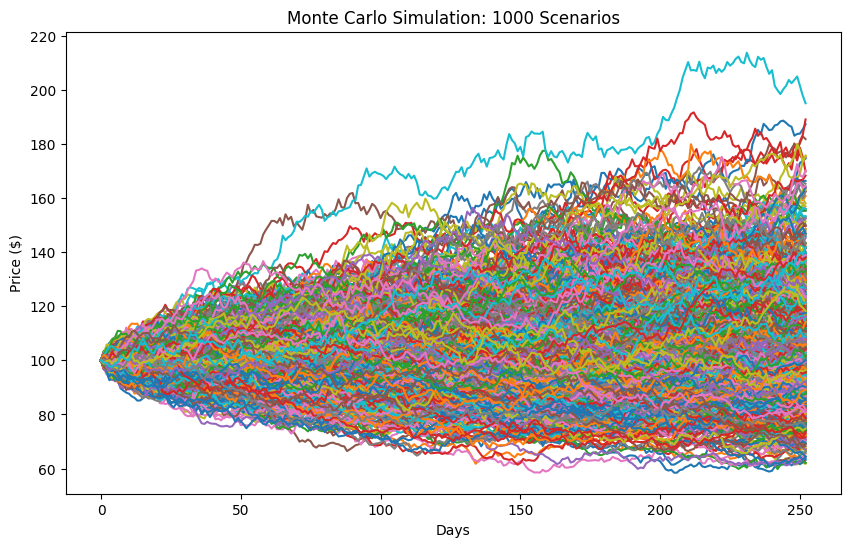

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 1. PARAMETERS
S0 = 100
mu = 0.05
sigma = 0.20
T = 1.0
dt = 1/252
N = int(T/dt)
num_simulations = 1000  # <--- NEW: We want 1,000 parallel universes

# 2. THE QUANT WAY (Vectorized)
# Instead of a loop, we create a massive Matrix of random shocks.
# Shape: (252 days, 1000 simulations)
random_shocks = np.random.normal(0, 1, (N, num_simulations))

# 3. CALCULATE PATHS
# We use the "Exact Solution" of the SDE (It's faster/more accurate than Euler loop)
# Formula: S_t = S_0 * exp( (mu - 0.5*sigma^2)*t + sigma*W_t )
# Don't worry about the derivation yet; focus on the code structure.

# Calculate the "Brownian Motion" (Cumulative Sum of shocks)
W = np.cumsum(random_shocks * np.sqrt(dt), axis=0)

# Create the time array (0 to T)
time_step = np.linspace(dt, T, N).reshape(-1, 1) # Make it a column

# Apply the Geometric Brownian Motion Formula
# (This one line replaces the entire loop!)
drift_term = (mu - 0.5 * sigma**2) * time_step
diffusion_term = sigma * W
prices = S0 * np.exp(drift_term + diffusion_term)

# Add S0 to the beginning (Day 0)
prices = np.vstack([np.full((1, num_simulations), S0), prices])

# 4. PLOT
plt.figure(figsize=(10, 6))
plt.plot(prices)  # This will plot ALL 1,000 lines at once
plt.title(f"Monte Carlo Simulation: {num_simulations} Scenarios")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.show()

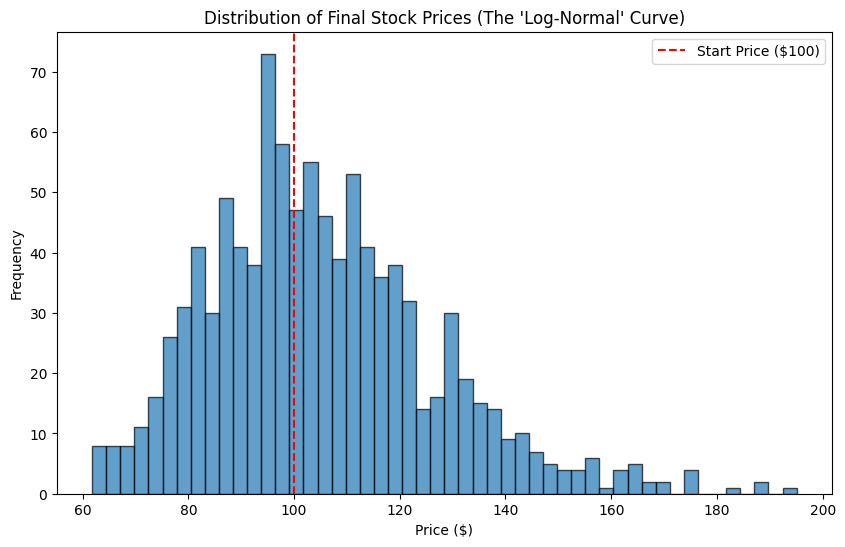

Average Final Price: $105.10
Number of paths above $110: 369


In [8]:
# 5. THE TRUTH (The Histogram)
# ----------------------------
final_prices = prices[-1]  # Get all 1000 prices on Day 252

plt.figure(figsize=(10, 6))
# Create a histogram (The "bins" are the bars)
plt.hist(final_prices, bins=50, edgecolor='black', alpha=0.7)

# Add a vertical line for our starting price ($100)
plt.axvline(x=S0, color='r', linestyle='--', label='Start Price ($100)')

plt.title("Distribution of Final Stock Prices (The 'Log-Normal' Curve)")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 6. THE QUANT QUESTION (Print the stats)
print(f"Average Final Price: ${np.mean(final_prices):.2f}")
print(f"Number of paths above $110: {np.sum(final_prices > 110)}")